<a href="https://colab.research.google.com/github/IlhamKhalis/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Buat Gamma Correction

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


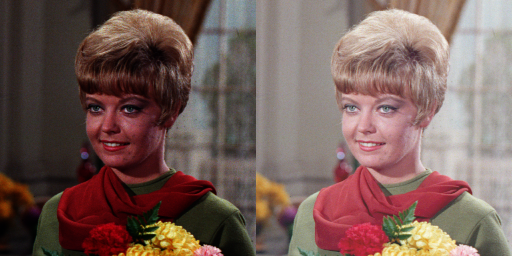

In [8]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Image Depth

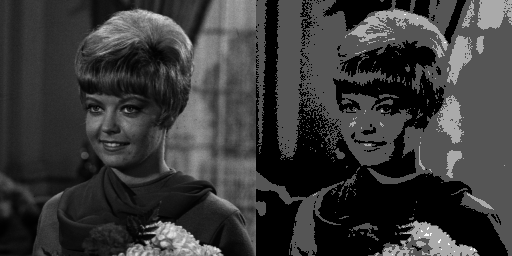

In [9]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
image = cv.imread('/content/drive/MyDrive/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(image.shape, image.dtype)

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    depth_image[i,j] = np.clip(round(image[i,j]/level) * level, 0, 255)

final_frame = cv.hconcat((image, depth_image))
cv2_imshow(final_frame)

Average Denoising

Nilai PSNR untuk citra 5  adalah 27.525768760075017 (dB)


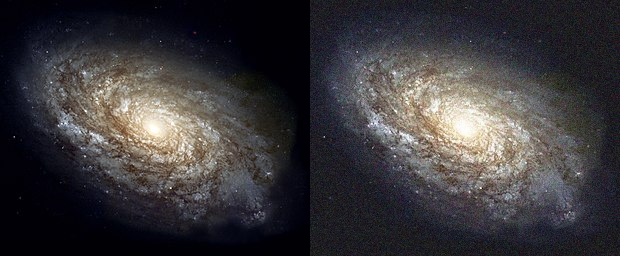

Nilai PSNR untuk citra 10  adalah 27.551225063783615 (dB)


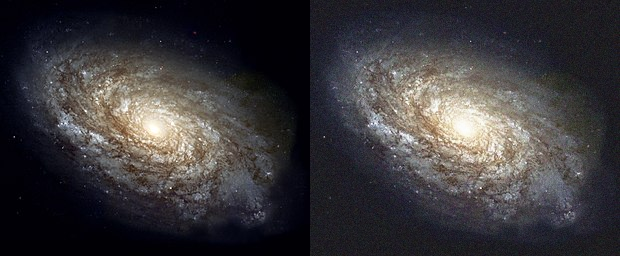

Nilai PSNR untuk citra 20  adalah 27.53142477063959 (dB)


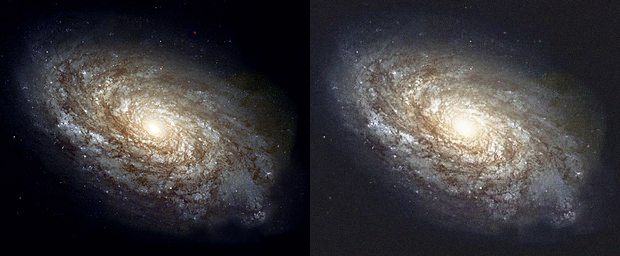

Nilai PSNR untuk citra 40  adalah 27.50490290423878 (dB)


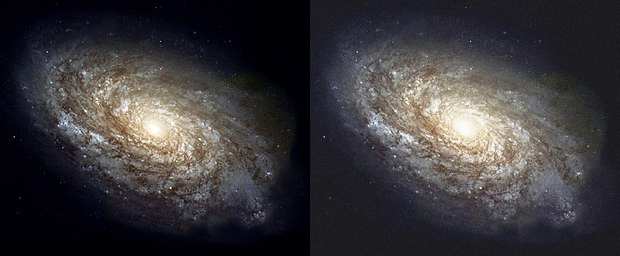

Nilai PSNR untuk citra 80  adalah 27.507941007336587 (dB)


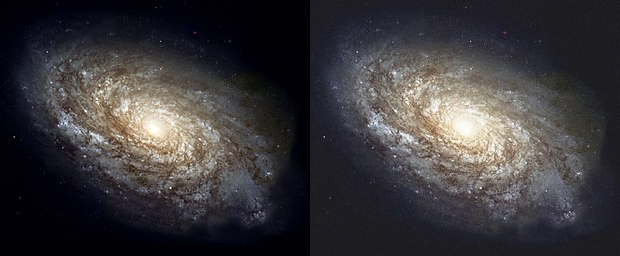

Nilai PSNR untuk citra 100  adalah 27.51433507250601 (dB)


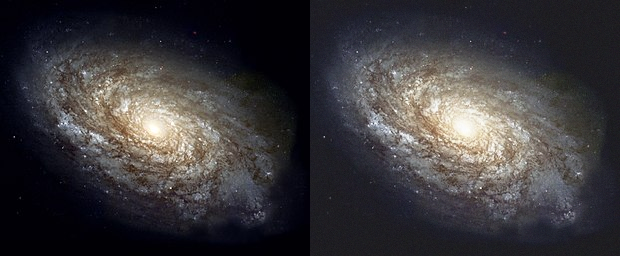

In [15]:
import glob
from math import log10, sqrt
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

def calculate_average_psnr(cv_img, noise_number):
    dst = cv_img[0]
    for i in range(noise_number):
        if i == 0:
            pass
        else:
            alpha = 1.0 / (i + 1)
            beta = 1.0 - alpha
            dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        if mse == 0:
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk citra {noise_number}  adalah {psnr} (dB)')
    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(galaxy_frame)

calculate_average_psnr(cv_img, 5)
calculate_average_psnr(cv_img, 10)
calculate_average_psnr(cv_img, 20)
calculate_average_psnr(cv_img, 40)
calculate_average_psnr(cv_img, 80)
calculate_average_psnr(cv_img, 100)

Image Masking

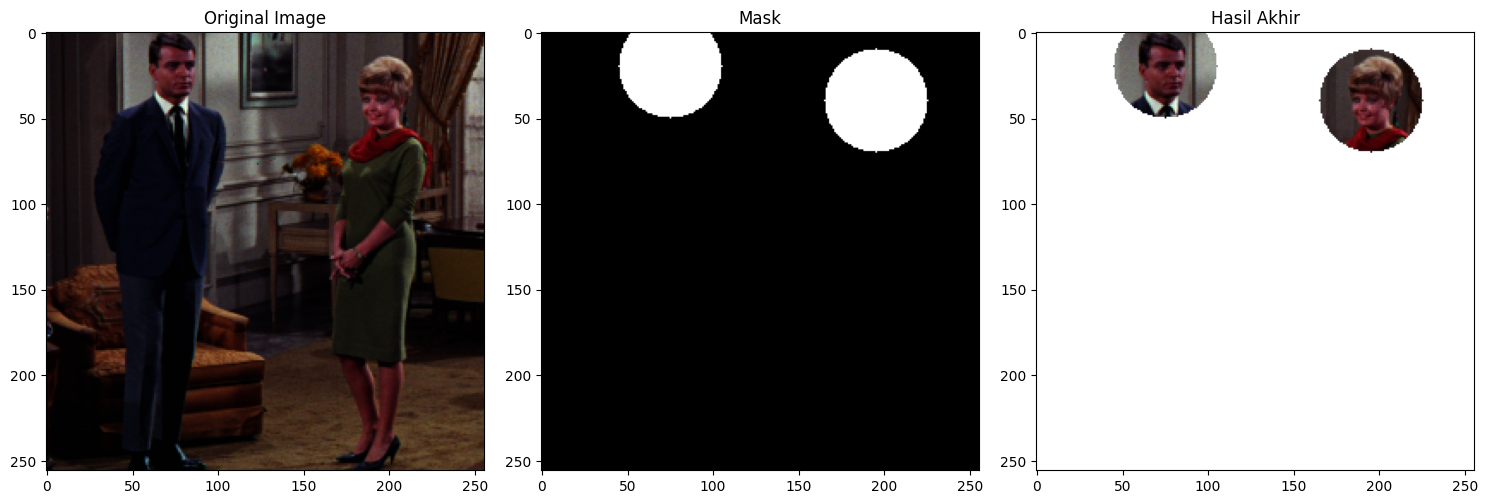

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK/Images/couple.tiff'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (75, 20), 30, 255, -1)
cv.circle(mask, (195, 40), 30, 255, -1)

# Menggunakan operasi bitwise untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Mengonversi gambar menjadi grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Menggunakan teknik thresholding
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan saluran warna Red, Green, Blue dari gambar asli
b, g, r = cv.split(masked)

# Membuat list yang berisi saluran warna Red, Green, Blue, dan saluran alpha
rgba = [b, g, r, alpha]

# Menggunakan cv.merge() untuk menggabungkan keempat saluran ke dalam gambar RGBA
final = cv.merge(rgba)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Maska
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Hasil akhir dengan latar belakang transparan
plt.subplot(133)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

Operator Lain

NOT

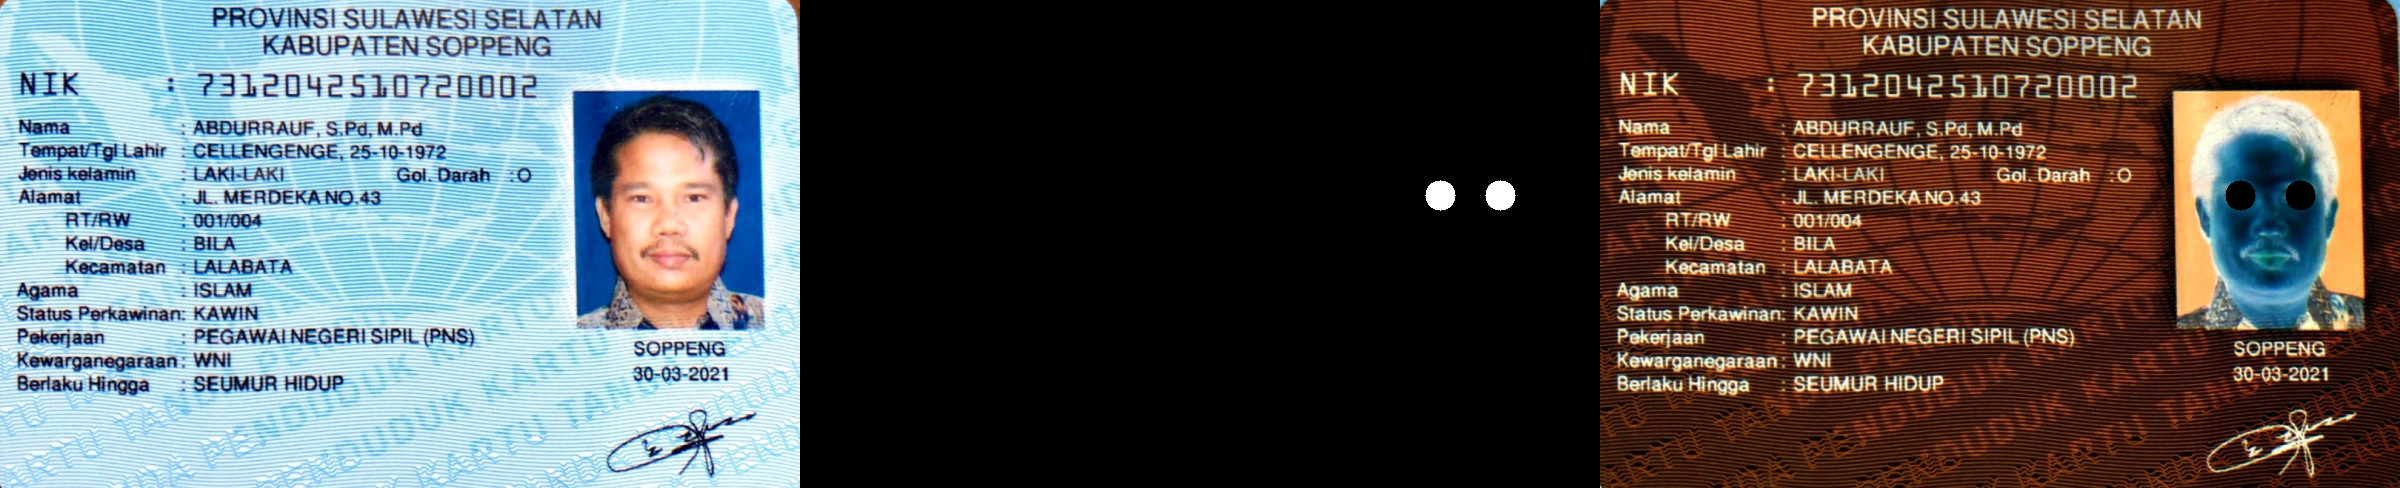

In [24]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi NOT
masked = ~original & ~mask

# Menggabungkan hasil citra asli, mask dan hasil operasi NOT
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

OR

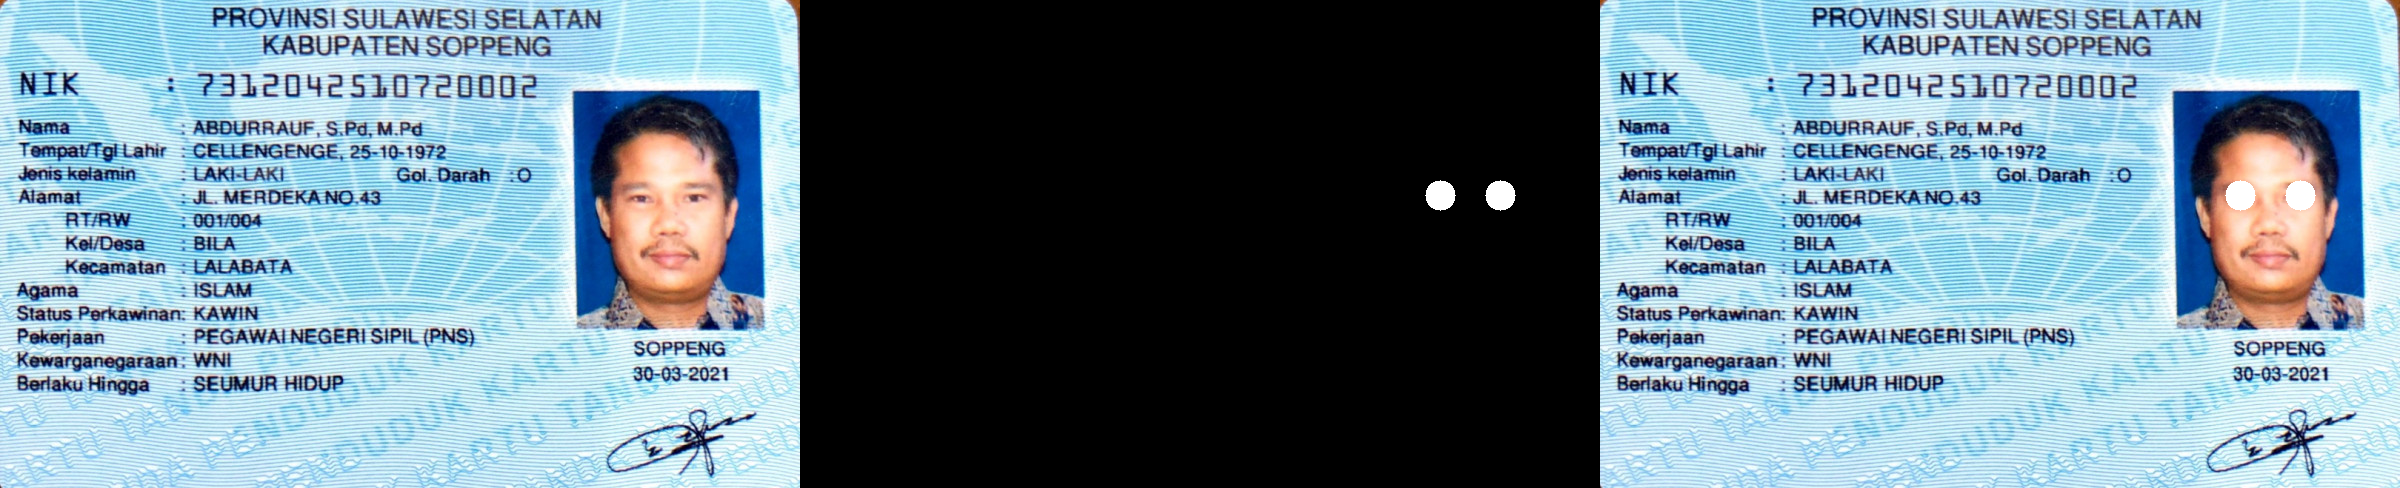

In [25]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi OR
masked = original | mask

# Menggabungkan hasil citra asli, mask dan hasil operasi OR
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

AND

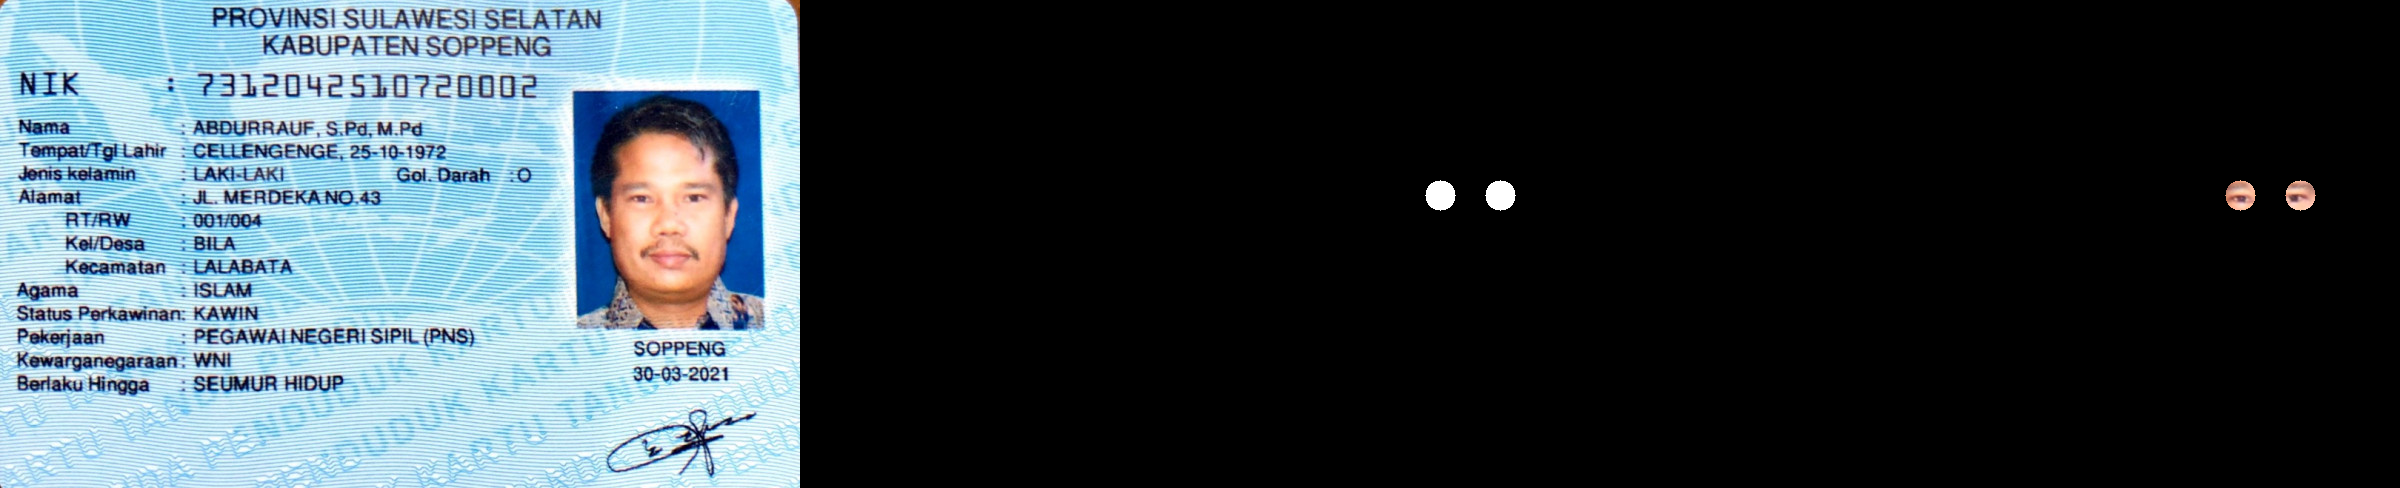

In [26]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_and(original, mask)

# Menggabungkan citra asli, mask, dan hasil AND bitwise
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

NAND

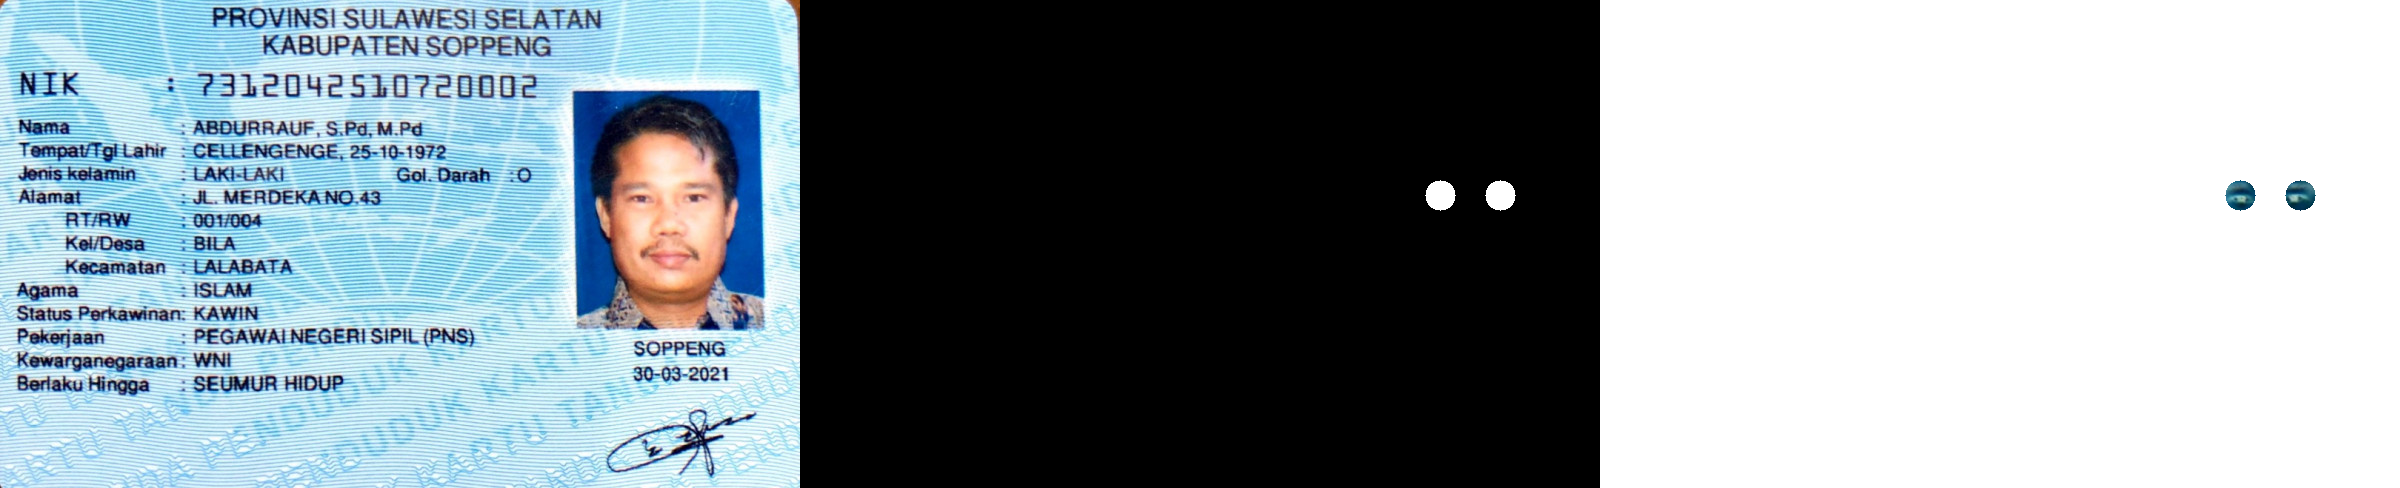

In [27]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
and_result = cv.bitwise_and(original, mask)

# Melakukan operasi AND bitwise antara gambar asli dan mask
nand_result = cv.bitwise_not(and_result)

# Menggabungkan citra asli, mask, dan hasil NAND bitwise dalam satu frame
final_frame = cv.hconcat((original, mask, nand_result))

# Menampilkan hasil
cv2_imshow(final_frame)

XOR

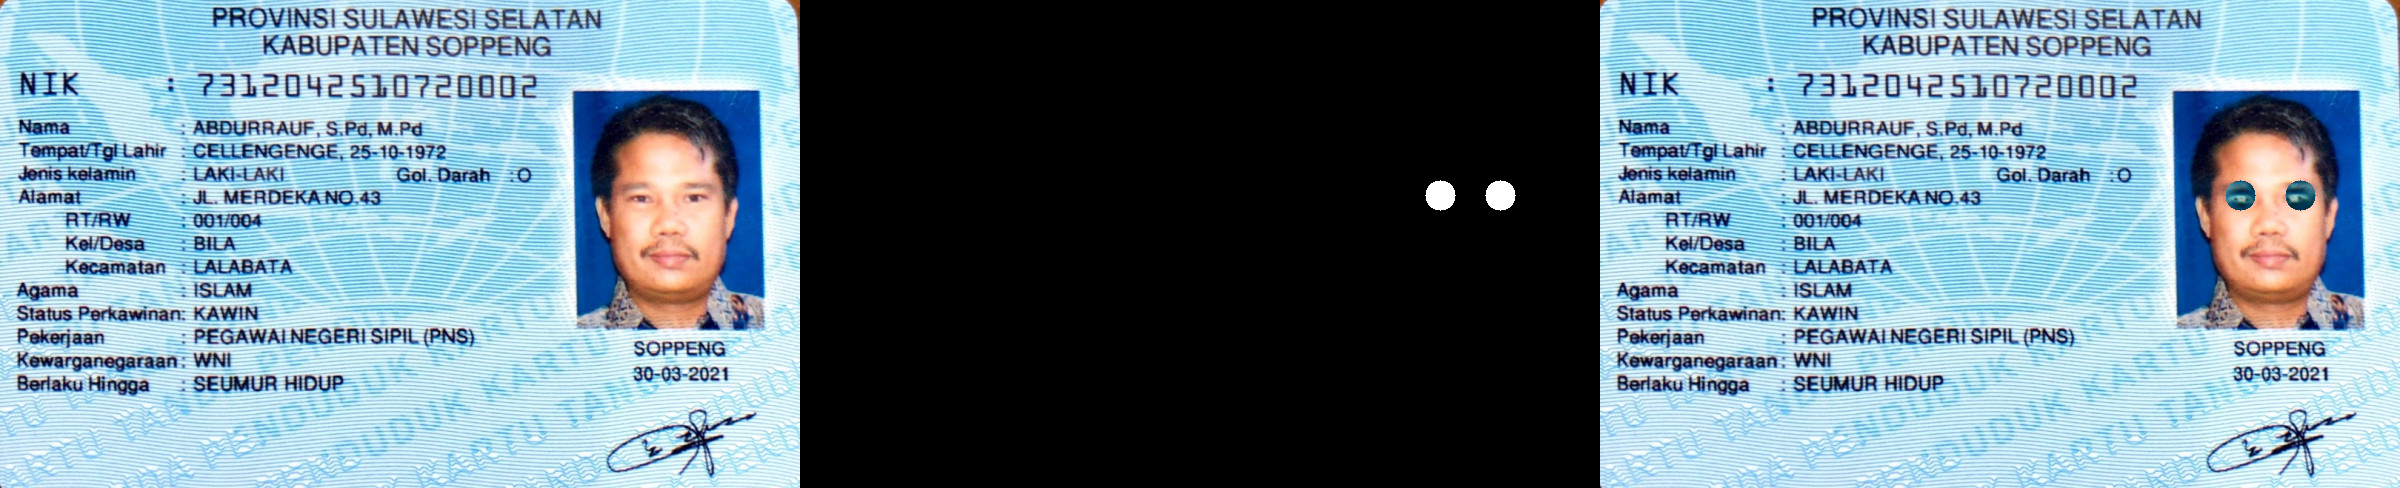

In [28]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_xor(original, mask)

# Menggabungkan citra asli, mask, dan hasil XOR bitwise dalam satu frame
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)